## Experimental Results for Feature Engineering Model 

In [1]:
## Import libraries 
import os

import pandas as pd
import numpy as np

from scipy import sparse

from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context("paper", font_scale=1.5)

In [2]:
# define functions 
def mean_absolute_percentage_error(y_true,y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Read Data 

In [3]:
## Read All data 
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/FE_model')

## Load Columns 
columns = pd.read_csv('columns.csv').rename(columns={'0':'feature'})

## Read Test Set 
X_test = sparse.load_npz('test/X_test.npz')
y_test = pd.read_hdf('test/y_test.hdf', key='test')

## Load Model 

In [4]:
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/models/FE_model')

## Load Model 
gbm = pickle.load(open('model.sav', 'rb'))
# Make predictions on test set 
y_pred_test = gbm.predict(X_test)

/Users/Ailyra/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Visualize Feature Importance

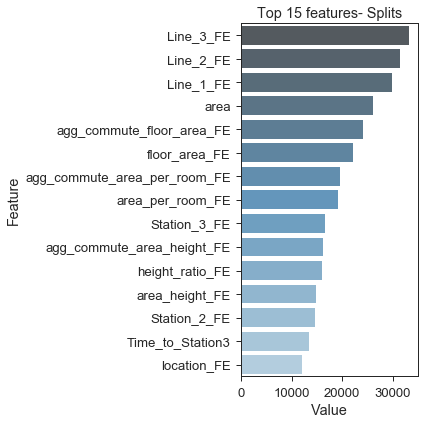

In [5]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Splits')

plt.tight_layout()

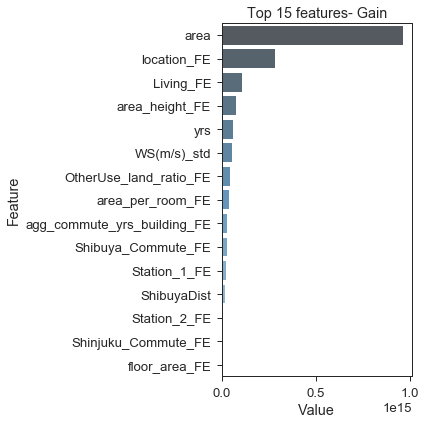

In [6]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importance(importance_type='gain'),columns['feature'])), 
                               columns=['Value','Feature'])

plt.figure(figsize=(6, 6))

barplot = sns.barplot(x="Value", y="Feature", palette=("Blues_d"),alpha=0.85, data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:15])

plt.title('Top 15 features- Gain')

plt.tight_layout()

In [7]:
## Need to make code that writes a file for this at the end
os.chdir('/Volumes/SeagateExternal/Masters_Thesis_Tokyo_Rent_Prediction/data/postproc')
postproc = pd.read_csv('tokyo_postproc.csv')

In [8]:
## Combine Test Predictions and Actuals 
testframe = pd.DataFrame({'pred':y_pred_test,'actual':y_test})
testframe['residuals'] = testframe.pred - testframe.actual
testframe = pd.merge(testframe, postproc, left_index=True,right_index=True)
testframe.head(10)

,pred,actual,residuals,title,location,yrs,floor,rent,deposit,gratuity,...,Car_2,Walk_2,Bus_2,Line_2,Station_2,Car_3,Walk_3,Bus_3,Line_3,Station_3
133746,157651.450864,155000,2651.450864,都営三田線 三田駅 地下1地上10階建 築13年,港区芝４,13,5,147000,1,1,...,NaN,5.0,NaN,ＪＲ山手線,田町駅,NaN,10.0,NaN,都営三田線,芝公園駅
135650,195398.623670,204000,-8601.376330,コンフォリア三田ＥＡＳＴ,港区芝４,12,7,194000,1,0,...,NaN,7.0,NaN,ＪＲ山手線,田町駅,NaN,10.0,NaN,都営三田線,芝公園駅
148095,159382.479575,155000,4382.479575,本芝ビル,港区芝４,13,5,147000,1,1,...,NaN,5.0,NaN,ＪＲ山手線,田町駅,NaN,11.0,NaN,都営三田線,芝公園駅
150852,249880.965045,260000,-10119.034955,名倉堂ビル,港区芝４,16,3,260000,1,1,...,NaN,6.0,NaN,ＪＲ山手線,田町駅,NaN,15.0,NaN,都営大江戸線,赤羽橋駅
156674,114393.916056,115000,-606.083944,シャリオ本芝,港区芝４,13,4,109000,1,1,...,NaN,3.0,NaN,ＪＲ山手線,田町駅,NaN,NaN,NaN,No_Line_3,No_Station_3
137352,116650.690508,115000,1650.690508,パレステュディオ三田,港区芝４,16,11,105000,1,1,...,NaN,3.0,NaN,都営三田線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅
139754,163896.014665,175000,-11103.985335,コンフォリア三田イースト,港区芝４,12,13,165000,1,0,...,NaN,5.0,NaN,都営浅草線,三田駅,NaN,5.0,NaN,都営三田線,三田駅
142769,130645.915400,132000,-1354.084600,ＪＲ山手線 田町駅 地下1地上13階建 築12年,港区芝４,12,3,125000,1,0,...,NaN,5.0,NaN,都営浅草線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅
150683,120718.232036,105000,15718.232036,メインステージ三田アーバンスクエア,港区芝４,6,5,93000,0,1,...,NaN,2.0,NaN,都営三田線,三田駅,NaN,13.0,NaN,ＪＲ山手線,浜松町駅
155753,150033.361853,149000,1033.361853,パレステュディオ三田,港区芝４,16,13,139000,1,1,...,NaN,3.0,NaN,都営三田線,三田駅,NaN,10.0,NaN,都営三田線,芝公園駅


In [9]:
## Rebin values
testframe['targetbins'] = pd.qcut(testframe['target'],15)

## Analysis by Price Bin 

In [10]:
## MAPE/RMSE BINS 
bins = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['targetbins'].sort_values().unique():
    binnedtarget = testframe[testframe['targetbins'] == i]
    MAPE = mean_absolute_percentage_error(binnedtarget['actual'],binnedtarget['pred'])
    RMSE = np.sqrt(mean_squared_error(binnedtarget['actual'], binnedtarget['pred']))
    print(i, MAPE, RMSE)
    bins.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
SCORESDF = pd.DataFrame({'price_bins':bins,'MAPE':MAPEscores,'RMSE':RMSEscores})

(23999.999, 53000.0] 9.028723913605408 5831.4760361238195
(53000.0, 60000.0] 5.67548239003036 4720.823742773256
(60000.0, 66000.0] 5.073450952942853 4736.0863245321725
(66000.0, 72000.0] 4.833946330942927 4989.596547241695
(72000.0, 77000.0] 4.77193758458979 5384.258552003728
(77000.0, 82500.0] 4.852051595650094 5731.295058842674
(82500.0, 88000.0] 4.857635888669655 6388.308389484686
(88000.0, 95000.0] 4.8729567840743515 7175.717313936855
(95000.0, 102000.0] 4.268581909438899 6571.153226576561
(102000.0, 110000.0] 4.319187292851363 7184.653823523032
(110000.0, 121000.0] 3.9449152147459317 7345.015669693116
(121000.0, 135000.0] 4.13702436329958 8610.749663705577
(135000.0, 155000.0] 4.3863805884000895 10688.932555428179
(155000.0, 203000.0] 4.696566899970838 14354.875341459396
(203000.0, 790000.0] 5.684488777280329 33535.029665150425


(0, 10.5)

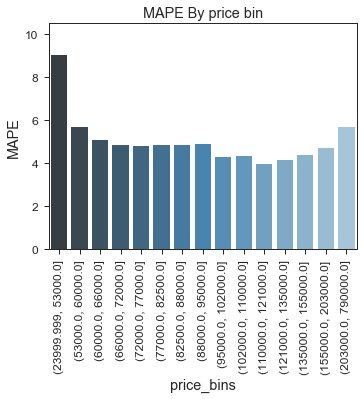

In [11]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['MAPE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('MAPE By price bin')
plt.ylim(0,10.5)

(0, 35000)

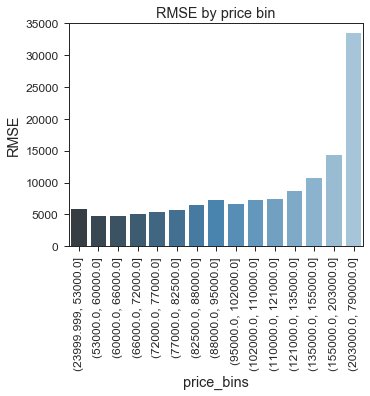

In [12]:
sns.barplot(x=SCORESDF['price_bins'], y=SCORESDF['RMSE'], data=SCORESDF,palette="Blues_d")
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('RMSE by price bin')
plt.ylim(0,35000)

## Analysis by Ku 

In [13]:
## MAPE/RMSE BINS 
Kulist = []
MAPEscores = [] 
RMSEscores = []
for i in testframe['Ku'].unique():
    Ku = testframe[testframe['Ku'] == i]
    MAPE = mean_absolute_percentage_error(Ku['actual'],Ku['pred'])
    RMSE = np.sqrt(mean_squared_error(Ku['actual'], Ku['pred']))
    print(i, MAPE, RMSE)
    Kulist.append(i)
    MAPEscores.append(MAPE)
    RMSEscores.append(RMSE)
KUSCORESDF = pd.DataFrame({'Ku':Kulist,'MAPE':MAPEscores,'RMSE':RMSEscores})

Minato 5.089614981315993 25552.516267377185
Katsushika 5.179007015332061 6618.775448375866
Setagaya 5.1992032492214175 10331.990410122773
Ota 5.042280198669 8095.559379903011
Meguro 4.519471647371258 12976.917608146008
Suginami 5.957115844183303 8697.624090889685
Sumida 4.770588718147257 7943.511314810909
Taito 4.582281338592504 9163.571059741693
Koto 3.9626017885954647 8840.607667875314
Shinagawa 4.62010544738654 12666.367035944231
Edogawa 5.063367898361269 6837.222672982545
Kita 5.0550611110118115 8042.055851509468
Arakawa 5.046589851572297 7412.108534933932
Bunkyo 5.587589125316975 12991.283625233655
Adachi 5.1405666080458445 7060.164450878234
Nakano 5.348035046836304 7694.434017497176
Nerima 4.6486333632356835 7291.900549393181
Toshima 5.217223568286503 10217.702478085332
Chiyoda 4.2303662691218955 24592.016427135168
Itabashi 4.887741099930296 6711.245878432843
Chuo 4.866920028951509 20301.729194817963
Shinjuku 5.085504305875721 13755.483025157002
Shibuya 5.328862088208554 16508.51

In [14]:
## Add Region Coding 
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Itabashi','Kita']),'North_outer',None)
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Nerima','Suginami','Nakano']),'West',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Toshima','Bunkyo']),'North_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Arakawa','Adachi','Katsushika','Edogawa']),'East_outer',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Koto','Taito','Sumida']),'East_inner',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Shibuya','Shinjuku','Minato','Chiyoda','Chuo']),'Central',KUSCORESDF['Region'])
KUSCORESDF['Region'] = np.where(KUSCORESDF['Ku'].isin(['Setagaya','Meguro','Shinagawa','Ota']),'South',KUSCORESDF['Region'])

In [15]:
regions= ['North_outer','West','North_inner','East_outer','East_inner','Central','South']

## MAPE by Ku

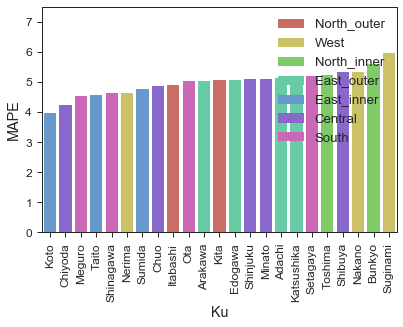

In [16]:
KUSCORESDF = KUSCORESDF.sort_values(by='MAPE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['MAPE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False, palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,7.5)
plt.legend()

## RMSE by Ku

(0, 25000)

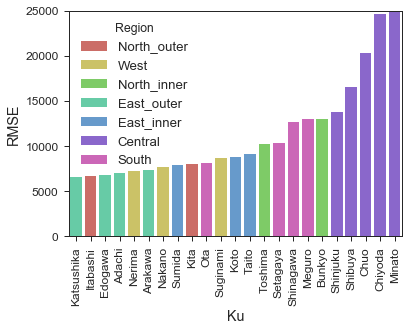

In [17]:
KUSCORESDF = KUSCORESDF.sort_values(by='RMSE')
sns.barplot(x=KUSCORESDF['Ku'], y=KUSCORESDF['RMSE'], data=KUSCORESDF,hue=KUSCORESDF['Region'], dodge=False,palette=sns.color_palette("hls", 7), hue_order=regions)
plt.tight_layout() 
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,25000)